In [ ]:
from google.colab import files
data = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
print (df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, train_size = 0.7, random_state = 9)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_prediction)
print(accuracy)

0.7229437229437229


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
graph_data = StringIO()
export_graphviz(model, out_file=graph_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names = ['0', '1'])
print(graph_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Glucose &le; 143.5<br/>gini = 0.454<br/>samples = 537<br/>value = [350, 187]<br/>class = 0>, fillcolor="#f3c4a3"] ;
1 [label=<Age &le; 28.5<br/>gini = 0.355<br/>samples = 411<br/>value = [316, 95]<br/>class = 0>, fillcolor="#eda775"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<BMI &le; 45.4<br/>gini = 0.204<br/>samples = 226<br/>value = [200, 26]<br/>class = 0>, fillcolor="#e89153"] ;
1 -> 2 ;
3 [label=<gini = 0.179<br/>samples = 221<br/>value = [199, 22]<br/>class = 0>, fillcolor="#e88f4f"] ;
2 -> 3 ;
4 [label=<gini = 0.32<br/>samples = 5<br/>value = [1, 4]<br/>class = 1>, fillcolor="#6ab6ec"] ;
2 -> 4 ;
5 [label=<BMI &le; 26.95<br/>gini = 0.468<br/>samples = 185<br/>value = [116, 69]<br/>class = 0>, fillcolor="#f4ccaf"] ;
1 -> 5 ;
6 [label=<gini = 0.13<br/>samples = 43<br/>value = [40, 3]<br/>class = 0>, fillcolor="#e78a48"]

In [ ]:
from IPython.display import Image
import pydotplus

graph = pydotplus.graph_from_dot_data(graph_data.getvalue())
graph.write_png('diabetes.png')

True

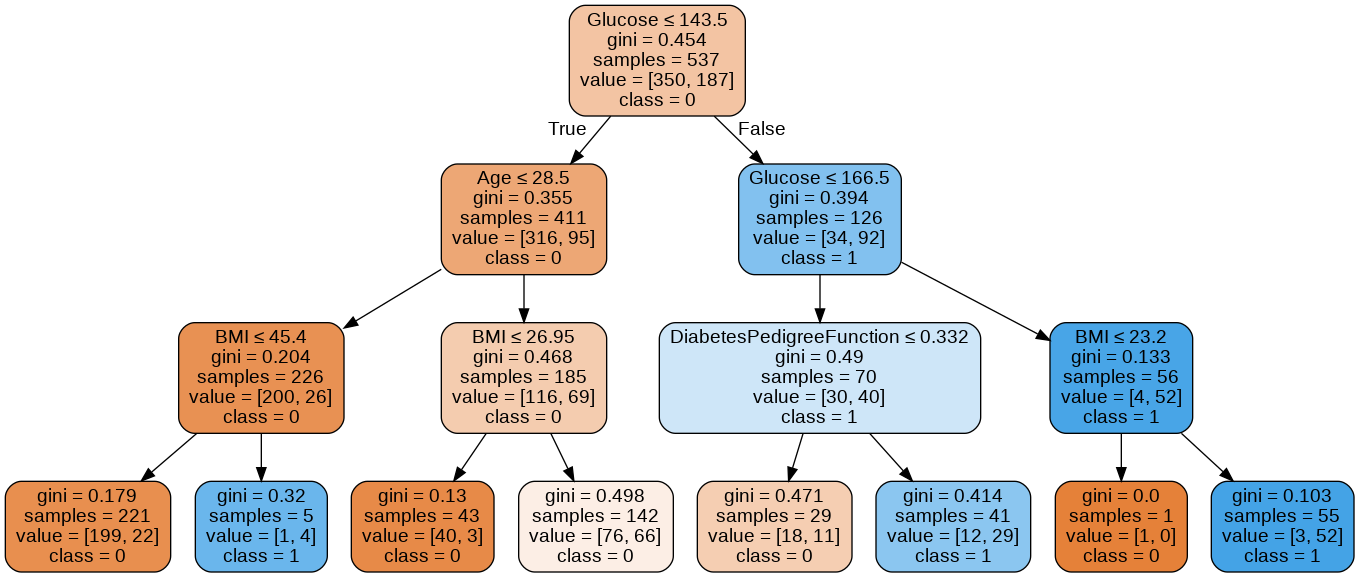

In [ ]:
Image(graph.create_png())